In [65]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

# KNN & Draft Round

In [82]:
df = pd.read_csv('Offense/clean_offense.csv')
df.head(50)

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round,Draft_Outcome
0,1,2000,Bashir Yamini,WR,0.0,Iowa,College Stats,75,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN,8,undrafted
1,2,2000,Spergon Wynn,QB,2.0,Texas State,College Stats,75,229,4.91,34.0,NaN,108.0,7.71,4.59,Cleveland Browns,6,drafted
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,36.0,NaN,123.0,7.22,4.16,Seattle Seahawks,6,drafted
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,NaN,76,332,5.26,29.0,28.0,97.0,7.78,4.72,Philadelphia Eagles,2,drafted
4,5,2000,Michael Wiley,RB,4.0,Ohio State,College Stats,71,193,4.50,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys,5,drafted
5,6,2000,Dez White,WR,19.0,Georgia Tech,College Stats,73,218,4.62,37.5,NaN,124.0,6.91,4.09,Chicago Bears,3,drafted
6,7,2000,Austin Wheatley,TE,0.0,Iowa,College Stats,76,254,4.66,32.5,NaN,121.0,6.97,4.18,New Orleans Saints,5,drafted
7,8,2000,James Whalen,TE,1.0,Kentucky,College Stats,74,228,4.78,31.0,NaN,110.0,7.42,4.22,Tampa Bay Buccaneers,5,drafted
8,9,2000,Peter Warrick,WR,29.0,Florida State,College Stats,71,194,4.58,NaN,NaN,NaN,NaN,NaN,Cincinnati Bengals,1,drafted
9,10,2000,Troy Walters,WR,13.0,Stanford,College Stats,66,171,4.55,32.5,NaN,106.0,6.61,3.84,Minnesota Vikings,5,drafted


In [83]:
df.count()

Rk               2910
Year             2910
Player           2910
Pos              2910
AV               2008
School           2910
College          2182
Height           2910
Wt               2910
40YD             2880
Vertical         2332
BenchReps        1773
Broad Jump       2295
3Cone            1973
Shuttle          1999
Drafted          1777
Round            2910
Draft_Outcome    2910
dtype: int64

In [89]:
df3 = df[['Rk','Year','Player','Pos','School','Height','Wt','40YD','Vertical','BenchReps','Broad Jump','3Cone','Shuttle','Round','Draft_Outcome']]
df3.head()

,Rk,Year,Player,Pos,School,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Round,Draft_Outcome
0,1,2000,Bashir Yamini,WR,Iowa,75,191,4.53,33.0,NaN,130.0,7.09,4.18,8,undrafted
1,2,2000,Spergon Wynn,QB,Texas State,75,229,4.91,34.0,NaN,108.0,7.71,4.59,6,drafted
2,3,2000,James Williams,WR,Marshall,71,180,4.59,36.0,NaN,123.0,7.22,4.16,6,drafted
3,4,2000,Bobbie Williams,OT,Arkansas,76,332,5.26,29.0,28.0,97.0,7.78,4.72,2,drafted
4,5,2000,Michael Wiley,RB,Ohio State,71,193,4.50,NaN,NaN,NaN,NaN,NaN,5,drafted


In [91]:
df2 = df3.dropna(axis='rows')
df2.head()

,Rk,Year,Player,Pos,School,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Round,Draft_Outcome
3,4,2000,Bobbie Williams,OT,Arkansas,76,332,5.26,29.0,28.0,97.0,7.78,4.72,2,drafted
10,11,2000,Todd Wade,OT,Mississippi,80,326,5.22,27.5,29.0,101.0,7.68,4.68,2,drafted
11,12,2000,Michael Thompson,OT,Tennessee State,76,305,5.28,26.0,16.0,104.0,7.99,4.73,4,drafted
14,15,2000,Mark Tauscher,OG,Wisconsin,75,318,5.37,27.0,22.0,90.0,7.91,4.84,7,drafted
16,17,2000,Shyrone Stith,RB,Virginia Tech,67,204,4.60,35.0,13.0,111.0,7.14,4.14,7,drafted


In [92]:
df2.count()

Rk               1245
Year             1245
Player           1245
Pos              1245
School           1245
Height           1245
Wt               1245
40YD             1245
Vertical         1245
BenchReps        1245
Broad Jump       1245
3Cone            1245
Shuttle          1245
Round            1245
Draft_Outcome    1245
dtype: int64

In [93]:
target = df2["Round"]

In [94]:
data = df2[['Height','Wt','40YD','Vertical','BenchReps','Broad Jump','3Cone','Shuttle']]
feature_names = data.columns
data.head()

,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle
3,76,332,5.26,29.0,28.0,97.0,7.78,4.72
10,80,326,5.22,27.5,29.0,101.0,7.68,4.68
11,76,305,5.28,26.0,16.0,104.0,7.99,4.73
14,75,318,5.37,27.0,22.0,90.0,7.91,4.84
16,67,204,4.60,35.0,13.0,111.0,7.14,4.14


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.237
k: 3, Train/Test Score: 0.525/0.234
k: 5, Train/Test Score: 0.482/0.263
k: 7, Train/Test Score: 0.454/0.266
k: 9, Train/Test Score: 0.449/0.311
k: 11, Train/Test Score: 0.434/0.314
k: 13, Train/Test Score: 0.433/0.308
k: 15, Train/Test Score: 0.416/0.317
k: 17, Train/Test Score: 0.417/0.333
k: 19, Train/Test Score: 0.429/0.356


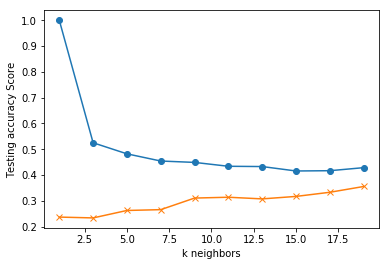

In [96]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [98]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.308


# KNN & Draft Outcome

In [101]:
target_draft = df2["Draft_Outcome"]
target_draft.head()

3     drafted
10    drafted
11    drafted
14    drafted
16    drafted
Name: Draft_Outcome, dtype: object

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

k: 1, Train/Test Score: 1.000/0.580
k: 3, Train/Test Score: 0.776/0.612
k: 5, Train/Test Score: 0.734/0.635
k: 7, Train/Test Score: 0.715/0.631
k: 9, Train/Test Score: 0.696/0.628
k: 11, Train/Test Score: 0.698/0.631
k: 13, Train/Test Score: 0.686/0.663
k: 15, Train/Test Score: 0.693/0.644
k: 17, Train/Test Score: 0.691/0.628
k: 19, Train/Test Score: 0.698/0.638


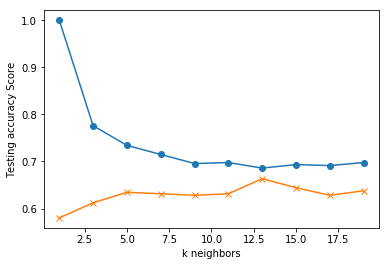

In [103]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [104]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.663


# SVM & Draft Outcome

In [105]:
target_names = ['undrafted','drafted']

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

In [113]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.679


In [115]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    drafted       0.71      0.84      0.77       195
  undrafted       0.60      0.42      0.49       117

avg / total       0.67      0.68      0.66       312



# GridSearch & Draft Round

In [38]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target, random_state=42)

In [40]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..... C=1, gamma=0.0001, score=0.21428571428571427, total=   1.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ..... C=1, gamma=0.0001, score=0.13138686131386862, total=   0.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ..... C=1, gamma=0.0001, score=0.23880597014925373, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.21428571428571427, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.13138686131386862, total=   0.6s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.23880597014925373, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ....... C=1, gamma=0.01, score=0.21428571428571427, total=   0.9s
[CV] C=1, gamma=0.01 .................................................
[CV] ....... C=1, gamma=0.01, score=0.13138686131386862, total=   0.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ....... C=1, gamma=0.01, score=0.23880597014925373, total=   0.4s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [41]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [42]:
# List the best score
print(grid.best_score_)

0.20194647201946472


In [43]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [123]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    drafted       0.72      0.84      0.78       195
  undrafted       0.63      0.45      0.53       117

avg / total       0.69      0.70      0.68       312



# Grid Search and Draft Outcome

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

In [119]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6913183279742765, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.6109324758842444, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, score=0.729903536977492, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6913183279742765, total=   0.7s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6109324758842444, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] ........ C=1, gamma=0.001, score=0.729903536977492, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.6913183279742765, total=   0.7s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.6109324758842444, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ......... C=1, gamma=0.01, score=0.729903536977492, total=   0.6s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   46.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [120]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [121]:
# List the best score
print(grid.best_score_)

0.6784565916398714


In [122]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [124]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    drafted       0.72      0.84      0.78       195
  undrafted       0.63      0.45      0.53       117

avg / total       0.69      0.70      0.68       312



# Deep Learning and Draft Round


In [45]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [48]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=8))
model.add(Dense(units=1, activation='softmax'))

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

ValueError: You are passing a target array of shape (411, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

# Neural Network & Draft Outcome

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

In [155]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [156]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [157]:
from tensorflow.keras.utils import to_categorical

In [158]:
from keras.utils import to_categorical
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["drafted","undrafted"])
y_train_binary = le.transform(y_train)
y_test_binary = le.transform(y_test)

In [164]:
y_test_binary

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [165]:
from tensorflow.keras.utils import to_categorical

In [166]:
# One-hot encoding
y_train_categorical = to_categorical(y_train_binary)
y_test_categorical = to_categorical(y_test_binary)

In [167]:
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [172]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=8))
model.add(Dense(units=2, activation='softmax'))

In [173]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 14        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [174]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [175]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 1.3122 - acc: 0.3794
Epoch 2/100
 - 0s - loss: 1.0833 - acc: 0.4009
Epoch 3/100
 - 0s - loss: 0.9211 - acc: 0.4212
Epoch 4/100
 - 0s - loss: 0.8203 - acc: 0.4566
Epoch 5/100
 - 0s - loss: 0.7619 - acc: 0.4984
Epoch 6/100
 - 0s - loss: 0.7298 - acc: 0.5338
Epoch 7/100
 - 0s - loss: 0.7066 - acc: 0.5798
Epoch 8/100
 - 0s - loss: 0.6907 - acc: 0.5852
Epoch 9/100
 - 0s - loss: 0.6777 - acc: 0.6013
Epoch 10/100
 - 0s - loss: 0.6679 - acc: 0.6152
Epoch 11/100
 - 0s - loss: 0.6594 - acc: 0.6238
Epoch 12/100
 - 0s - loss: 0.6521 - acc: 0.6345
Epoch 13/100
 - 0s - loss: 0.6463 - acc: 0.6399
Epoch 14/100
 - 0s - loss: 0.6408 - acc: 0.6506
Epoch 15/100
 - 0s - loss: 0.6363 - acc: 0.6474
Epoch 16/100
 - 0s - loss: 0.6315 - acc: 0.6559
Epoch 17/100
 - 0s - loss: 0.6294 - acc: 0.6656
Epoch 18/100
 - 0s - loss: 0.6257 - acc: 0.6624
Epoch 19/100
 - 0s - loss: 0.6227 - acc: 0.6656
Epoch 20/100
 - 0s - loss: 0.6204 - acc: 0.6677
Epoch 21/100
 - 0s - loss: 0.6176 - acc: 0.6710
E

# Deep Learning

In [183]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=8))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [184]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 14        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [185]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 0.6719 - acc: 0.6174
Epoch 2/100
 - 0s - loss: 0.6601 - acc: 0.6174
Epoch 3/100
 - 0s - loss: 0.6495 - acc: 0.6174
Epoch 4/100
 - 0s - loss: 0.6408 - acc: 0.6174
Epoch 5/100
 - 0s - loss: 0.6362 - acc: 0.6174
Epoch 6/100
 - 0s - loss: 0.6329 - acc: 0.6217
Epoch 7/100
 - 0s - loss: 0.6289 - acc: 0.6270
Epoch 8/100
 - 0s - loss: 0.6260 - acc: 0.6367
Epoch 9/100
 - 0s - loss: 0.6234 - acc: 0.6420
Epoch 10/100
 - 0s - loss: 0.6209 - acc: 0.6506
Epoch 11/100
 - 0s - loss: 0.6188 - acc: 0.6688
Epoch 12/100
 - 0s - loss: 0.6162 - acc: 0.6720
Epoch 13/100
 - 0s - loss: 0.6148 - acc: 0.6795
Epoch 14/100
 - 0s - loss: 0.6127 - acc: 0.6817
Epoch 15/100
 - 0s - loss: 0.6109 - acc: 0.6763
Epoch 16/100
 - 0s - loss: 0.6093 - acc: 0.6774
Epoch 17/100
 - 0s - loss: 0.6072 - acc: 0.6742
Epoch 18/100
 - 0s - loss: 0.6052 - acc: 0.6806
Epoch 19/100
 - 0s - loss: 0.6035 - acc: 0.6849
Epoch 20/100
 - 0s - loss: 0.6007 - acc: 0.6902
Epoch 21/100
 - 0s - loss: 0.5997 - acc: 0.6881
E

In [186]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.6184735924769671, Accuracy: 0.6634615384615384


In [187]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.6150696445734073, Accuracy: 0.6634615369332142
